# Тема “Обучение без учителя”

### Задание 1 

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [48]:
#Импортируйте библиотеки pandas, numpy и matplotlib.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [50]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

from sklearn.datasets import load_boston

boston = load_boston()

C:\Users\DeskLodge\PfDS\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [51]:
#Создайте датафреймы X и y из этих данных.

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [52]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#Масштабируйте данные с помощью StandardScaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [54]:
#Постройте модель TSNE на тренировочный данных с параметрами:
#n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

C:\Users\DeskLodge\PfDS\env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


До:	(404, 13)
После:	(404, 2)


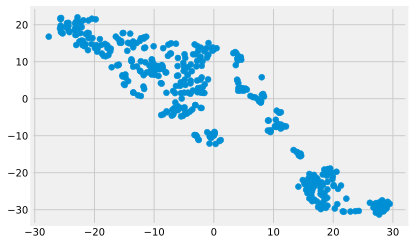

In [55]:
#Постройте диаграмму рассеяния на этих данных.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Из данных, представленных на рисунке, что данные можно попробовать разбить на такие кластеры, как от (-30,20) до (0,-10); от (5,10) до (10,-15) и от (15,-20) до (30,-30). Проверим...

### Задание 2 

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [56]:
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

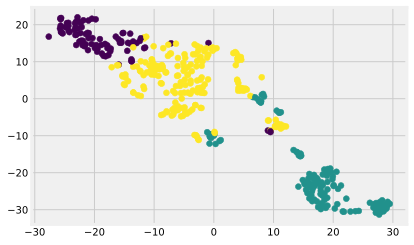

In [57]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
#и раскрасьте точки из разных кластеров разными цветами.

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Ошибся с кластерами...

In [58]:
#Вычислите средние значения price и CRIM в разных кластерах.

y_train.mean()

y_train[labels_train == 0].mean()

y_train[labels_train == 1].mean()

y_train[labels_train == 2].mean()

print('Среднее значение price во всей выборке:\t{}'.format(y_train.mean()))
print('Среднее значение price в первом кластере:\t{}'.format(y_train[labels_train == 0].mean()))
print('Среднее значение price во втором кластере:\t{}'.format(y_train[labels_train == 1].mean()))
print('Среднее значение price в третьем кластере:\t{}'.format(y_train[labels_train == 2].mean()))

Среднее значение price во всей выборке:	22.796534653465343
Среднее значение price в первом кластере:	27.78837209302326
Среднее значение price во втором кластере:	16.165354330708663
Среднее значение price в третьем кластере:	24.958115183246072


В первый и третий кластеры попала более дорогая недвижимость, во второй - дешевая.

Рассмотрим  признак - 'CRIM'.

In [59]:
print('Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 1: 0.07356558139534884
Кластер 2: 10.797028425196851
Кластер 3: 0.4216602094240837


Явно выделяется значение для второго кластера (самая дешевая недвижимость), различие между первым и третьим кластерами тоже есть, хотя и не такое большое.

### *Задание 3 

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [60]:
labels_test = kmeans.fit_predict(X_test)

#средние значения price
print('Среднее значение price во всей выборке:\t{}'.format(y_test.mean()))
print('Среднее значение price в первом кластере:\t{}'.format(y_test[labels_test == 0].mean()))
print('Среднее значение price во втором кластере:\t{}'.format(y_test[labels_test == 1].mean()))
print('Среднее значение price в третьем кластере:\t{}'.format(y_test[labels_test == 2].mean()))

#средние значения CRIM
print('Среднее значение CRIM в первом кластере: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Среднее значение CRIM во втором кластере: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в третьем кластере: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение price во всей выборке:	21.488235294117644
Среднее значение price в первом кластере:	23.91159420289855
Среднее значение price во втором кластере:	17.392307692307693
Среднее значение price в третьем кластере:	12.814285714285713
Среднее значение CRIM в первом кластере: 0.24642115942028991
Среднее значение CRIM во втором кластере: 8.469301923076923
Среднее значение CRIM в третьем кластере: 19.021665714285714


Выглядит всё так, будто на тестовой выборке второй и третий классы "поменялись местами".